# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering


# importing data

In [2]:
df = pd.read_excel("/Users/thibaultverger/Desktop/RSB/PGE3/S2/Customer Data Analysis/Final Evaluation/Customer_marketing_dataset.xlsx")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,0,0,0,0,0


In [4]:
df.shape

(2240, 24)

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

# Data Cleaning

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [8]:
df.fillna(0, inplace=True)

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

# Data Manipulation & Visualization 

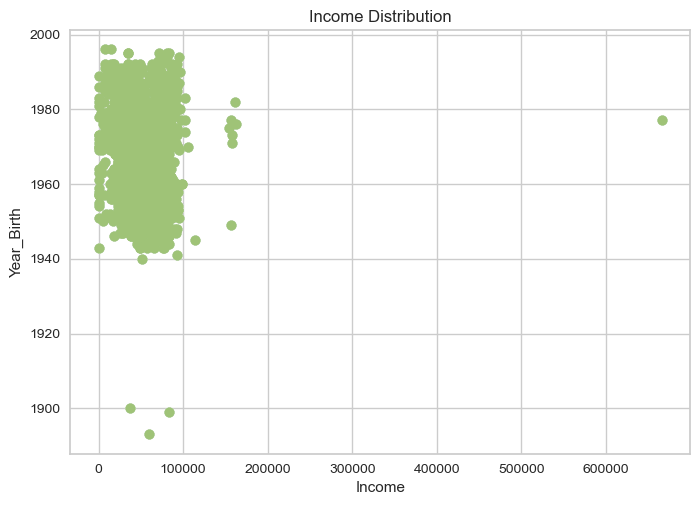

In [11]:
sns.scatterplot(data=df, x="Income", y="Year_Birth")

plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Year_Birth")
plt.scatter(df.Income, df.Year_Birth, s=50)

In [12]:
df = df.drop(df[df['Income'] == 666666].index, axis=0)
df = df.drop(df[df['Year_Birth']<1924].index, axis=0)

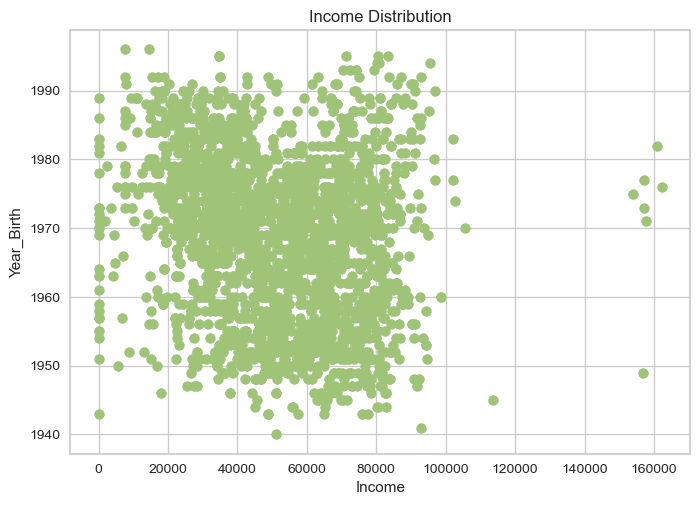

In [13]:
sns.scatterplot(data=df, x="Income", y="Year_Birth")

plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Year_Birth")
plt.scatter(df.Income, df.Year_Birth, s=50)

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df["Education"].value_counts()

Education
Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [16]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
print("The newest customer's arrive the :",max(dates))
print("The oldest customer's arrive the :",min(dates))


The newest customer's arrive the : 2014-06-29
The oldest customer's arrive the : 2012-07-30


In [17]:
df["MntTotal"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]

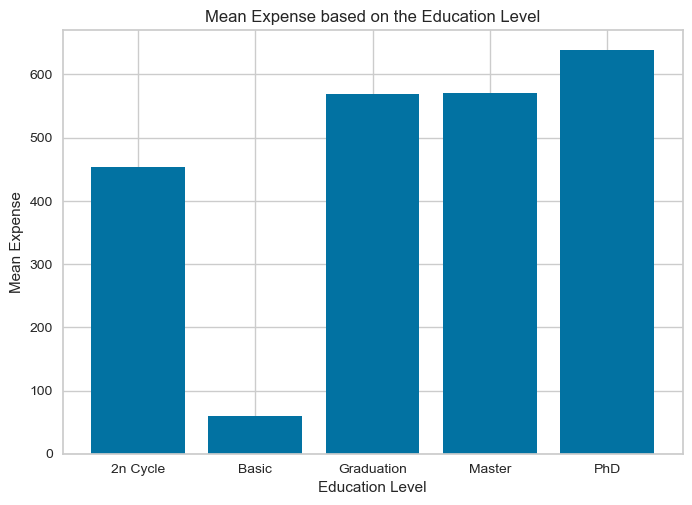

In [18]:
mean_expense_by_education = df.groupby('Education')['MntTotal'].mean()

plt.bar(mean_expense_by_education.index, mean_expense_by_education.values)
plt.title('Mean Expense based on the Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Expense')
plt.show()

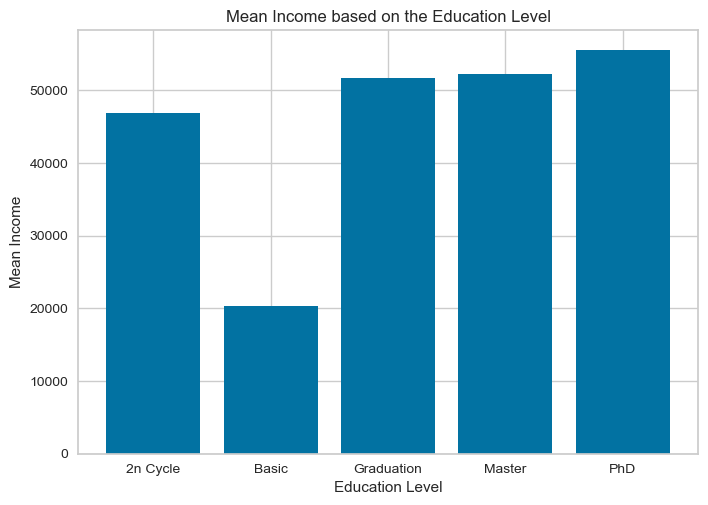

In [19]:
mean_income_by_education = df.groupby('Education')['Income'].mean()

plt.bar(mean_income_by_education.index, mean_income_by_education.values)
plt.title('Mean Income based on the Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Income')
plt.show()

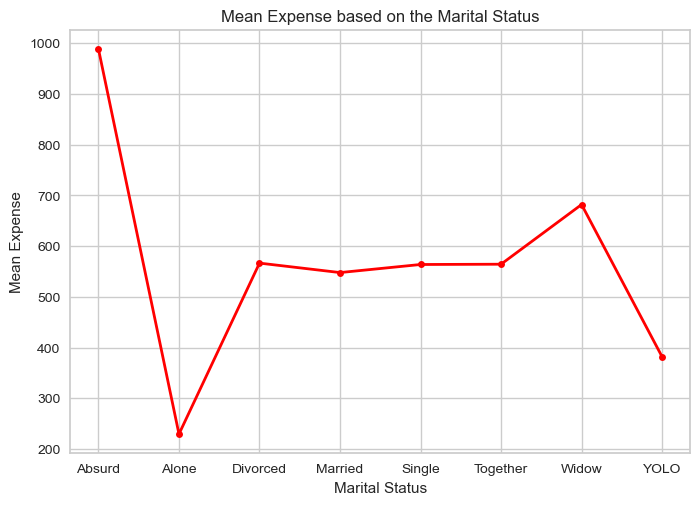

In [20]:
mean_expense_by_marital_s = df.groupby('Marital_Status')['MntTotal'].mean()

plt.plot(mean_expense_by_marital_s.index, mean_expense_by_marital_s.values, color='red', linewidth=2, marker='o', markersize=5)
plt.title('Mean Expense based on the Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Expense')
plt.show()

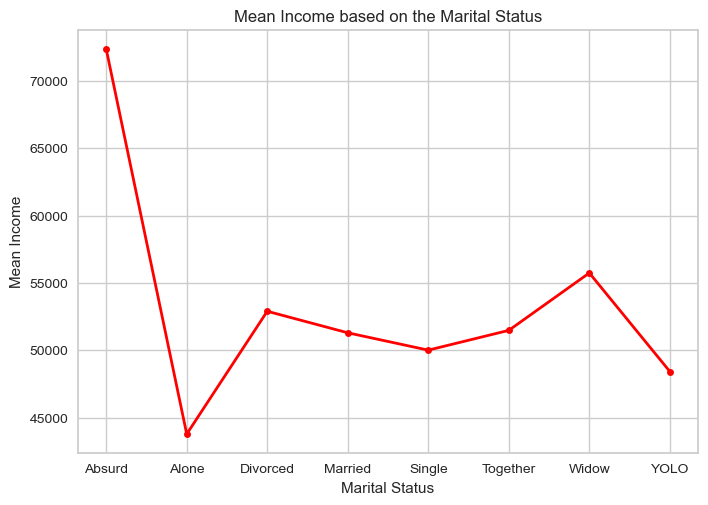

In [21]:
mean_income_by_marital_s = df.groupby('Marital_Status')['Income'].mean()
,
plt.plot(mean_income_by_marital_s.index, mean_income_by_marital_s.values,color='red', linewidth=2, marker='o', markersize=5)
plt.title('Mean Income based on the Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Income')
plt.show()

In [22]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [23]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [24]:
df["Age"] = 2024-df["Year_Birth"]

In [25]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

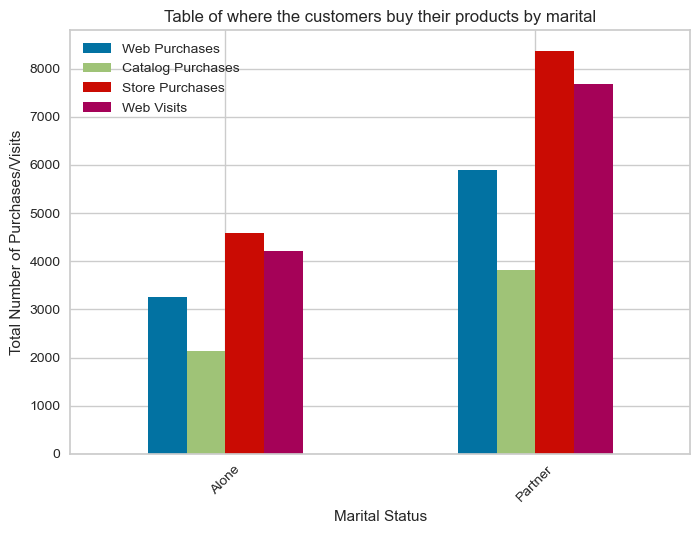

In [26]:
Marital_buy = pd.pivot_table(df, 
                 values=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'],
                 index=['Marital_Status'],
                 aggfunc='sum').reset_index()

Marital_buy.plot(x='Marital_Status', y=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], kind='bar' )

plt.title("Table of where the customers buy their products by marital")
plt.xlabel("Marital Status")
plt.ylabel("Total Number of Purchases/Visits")
plt.legend(["Web Purchases", "Catalog Purchases", "Store Purchases", "Web Visits"])
plt.xticks(rotation=45)  
plt.show()

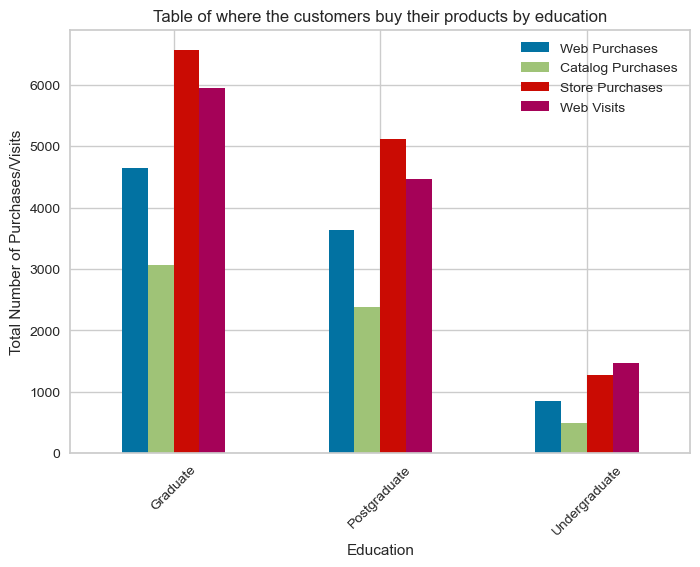

In [27]:
Edu_buy = pd.pivot_table(df, 
                 values=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'],
                 index=['Education'],
                 aggfunc='sum').reset_index()

Edu_buy.plot(x='Education', y=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], kind='bar' )

plt.title("Table of where the customers buy their products by education")
plt.xlabel("Education")
plt.ylabel("Total Number of Purchases/Visits")
plt.legend(["Web Purchases", "Catalog Purchases", "Store Purchases", "Web Visits"])
plt.xticks(rotation=45)  
plt.show()

In [28]:
drop_some_column = ["Dt_Customer", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "Year_Birth", "ID","Complain","Response"]
df = df.drop(drop_some_column, axis=1)

In [29]:
df["Marital_Status"]=df["Marital_Status"].replace({"Partner":"2", "Alone":"1",})
df['Marital_Status'] = df['Marital_Status'].astype('int64')

In [30]:
df["Education"]=df["Education"].replace({"Graduate":"2","Undergraduate":"1","Postgraduate":"3",})
df['Education'] = df['Education'].astype('int64')

In [31]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntTotal,Age,Children
0,2,1,58138.0,0,0,58,635,88,546,172,88,3,8,10,4,7,1529,67,0
1,2,1,46344.0,1,1,38,11,1,6,2,1,2,1,1,2,5,21,70,2
2,2,2,71613.0,0,0,26,426,49,127,111,21,1,8,2,10,4,734,59,0
3,2,2,26646.0,1,0,26,11,4,20,10,3,2,2,0,4,6,48,40,1
4,3,2,58293.0,1,0,94,173,43,118,46,27,5,5,3,6,5,407,43,1


# Scaler and Reduction

In [32]:
dfnew = df.copy()

In [33]:
scaler = StandardScaler()
scaler.fit(dfnew)
scaled_dfnew = pd.DataFrame(scaler.transform(dfnew),columns= dfnew.columns )

In [34]:
scaled_dfnew.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntTotal,Age,Children
0,-0.411891,-1.347635,0.305306,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.348738,1.407639,2.509801,-0.552429,0.692865,1.678121,1.016868,-1.264308
1,-0.411891,-1.347635,-0.229181,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.938855,1.273264,1.395139
2,-0.411891,0.742041,0.915974,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.298482,0.333146,-1.264308
3,-0.411891,0.742041,-1.121867,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.891999,-1.290693,0.065416
4,1.123090,0.742041,0.312331,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.268992,-1.034298,0.065416


In [35]:
pca = PCA(n_components=3)
pca.fit(scaled_dfnew)
PCA_dfnew = pd.DataFrame(pca.transform(scaled_dfnew), columns=(["col1","col2", "col3"]))
PCA_dfnew.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-2.224418e-17,2.675033,-5.468214,-2.424303,-0.775813,2.310474,7.458665
col2,2236.0,3.177740e-17,1.523000,-3.803879,-1.284723,-0.116904,1.090483,5.645733
col3,2236.0,3.972175e-17,1.143294,-4.200302,-0.809319,-0.046281,0.699803,5.682971


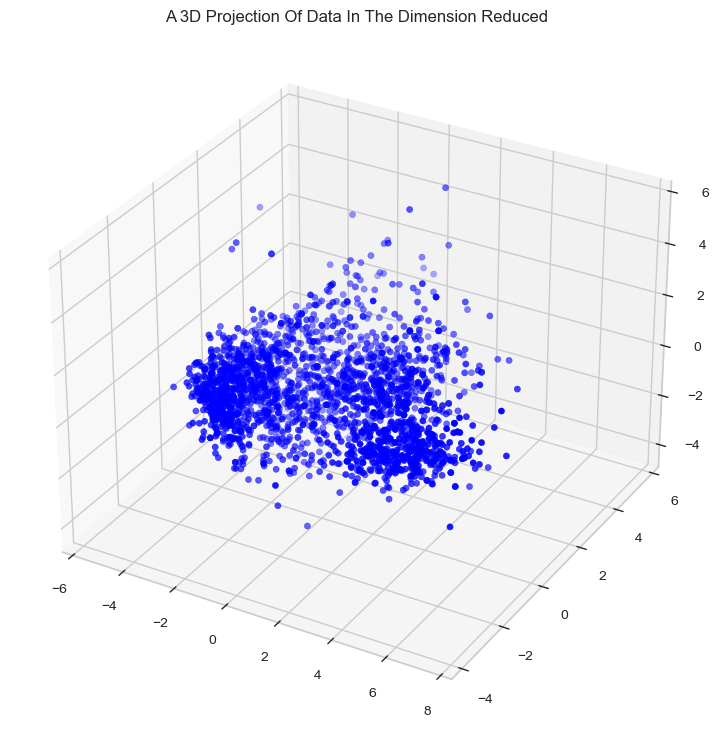

In [36]:
x =PCA_dfnew["col1"]
y =PCA_dfnew["col2"]
z =PCA_dfnew["col3"]

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Dimension Reduced")
plt.show()

# Clustering with Distortion Score 

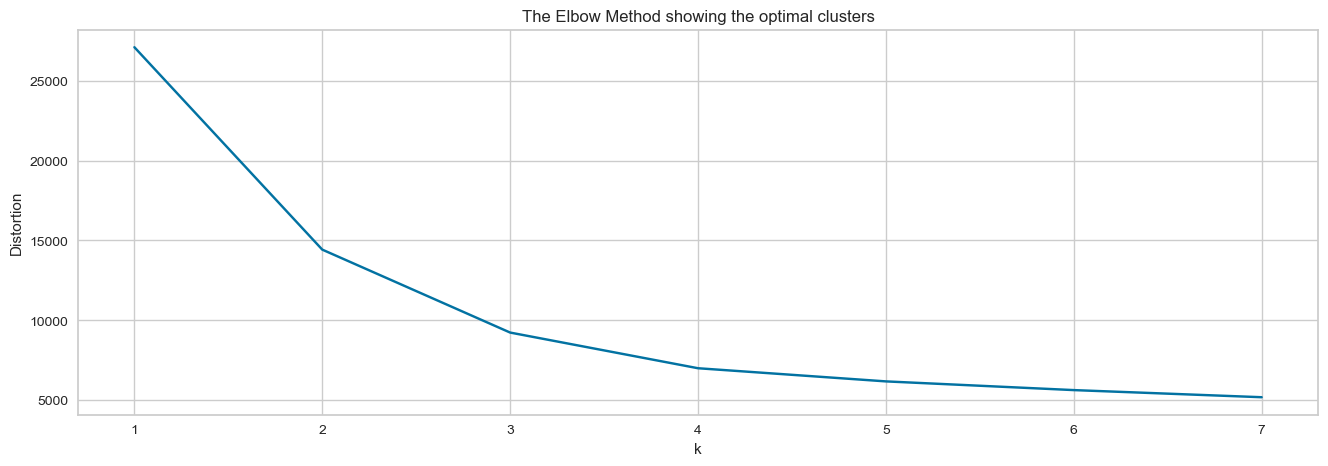

In [54]:
distortions = []
K = range(1,8)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(PCA_dfnew)
 distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

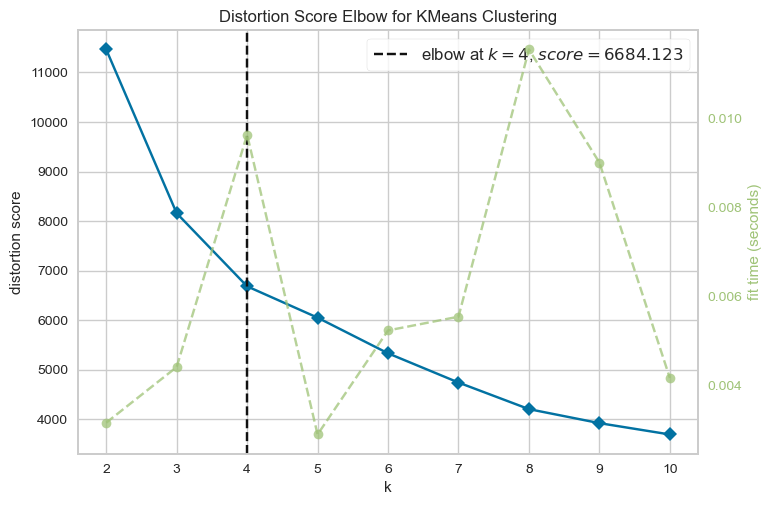

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_dfnew)
Elbow_M.show()

In [39]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_dfnew)
PCA_dfnew["Clusters"] = yhat_AC

df["Clusters"]= yhat_AC

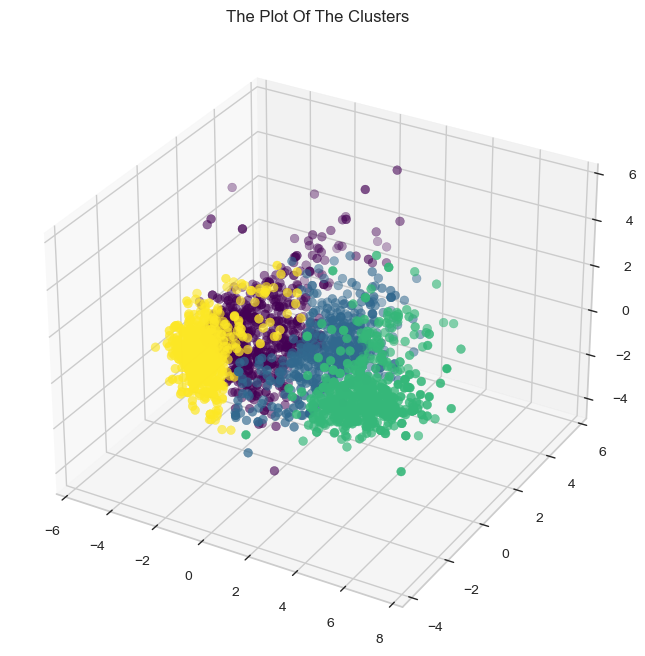

In [40]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_dfnew["Clusters"], marker='o', cmap='viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

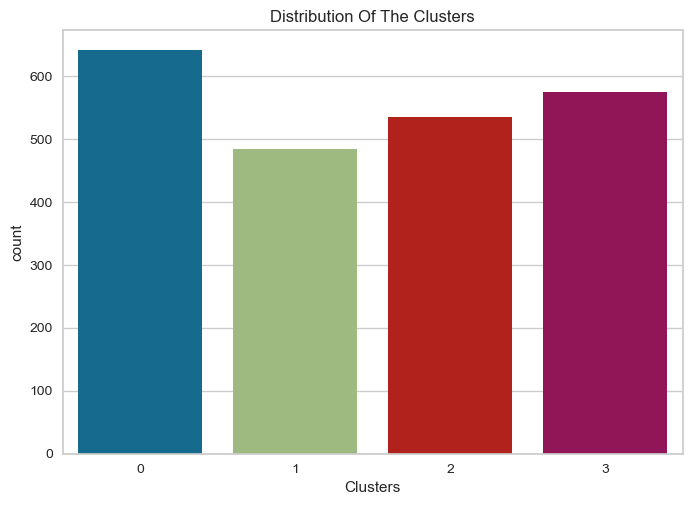

In [41]:
distribcl = sns.countplot(x=df["Clusters"])
distribcl.set_title("Distribution Of The Clusters")
plt.show()

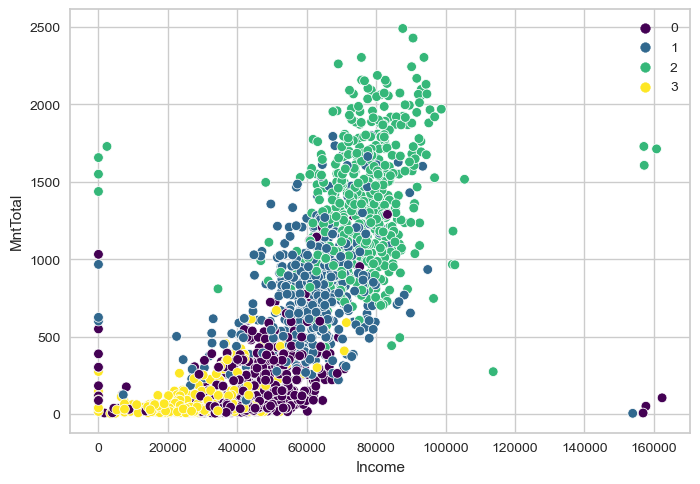

In [56]:
sns.scatterplot(data=df, x="Income", y="MntTotal", hue="Clusters", palette='viridis')
plt.legend()
plt.show()

# Profiling

In [43]:
average_age_per_cluster = df.groupby('Clusters')['Age'].mean().reset_index()

print(average_age_per_cluster)

   Clusters        Age
0         0  59.759750
1         1  58.637113
2         2  55.885981
3         3  46.198261


In [44]:
average_numberofchildren_per_cluster = df.groupby('Clusters')['Children'].mean().reset_index()

print(average_numberofchildren_per_cluster)

   Clusters  Children
0         0  1.675507
1         1  0.896907
2         2  0.183178
3         3  0.902609


In [45]:
MaritalStatus_per_cluster = df.groupby('Clusters')['Marital_Status'].value_counts().reset_index(name='Count')

MaritalStatus_per_cluster

,Clusters,Marital_Status,Count
0,0,2,429
1,0,1,212
2,1,2,313
3,1,1,172
4,2,2,332
5,2,1,203
6,3,2,368
7,3,1,207


In [46]:
Education_per_cluster = df.groupby('Clusters')['Education'].value_counts().reset_index(name='Count')

Education_per_cluster

,Clusters,Education,Count
0,0,3,313
1,0,2,296
2,0,1,32
3,1,2,240
4,1,3,217
5,1,1,28
6,2,2,290
7,2,3,192
8,2,1,53
9,3,2,300


In [47]:
average_MntTotal_per_cluster = df.groupby('Clusters')['MntTotal'].mean().reset_index()

print(average_MntTotal_per_cluster)

   Clusters     MntTotal
0         0   194.716069
1         1   748.779381
2         2  1353.949533
3         3    77.053913


In [48]:
average_Income_per_cluster = df.groupby('Clusters')['Income'].mean().reset_index()

print(average_Income_per_cluster)

   Clusters        Income
0         0  43944.507020
1         1  60454.412371
2         2  76395.629907
3         3  28821.579130


# Marketing Strategy

Text(0, 0.5, 'Average Number of Web Purchases')

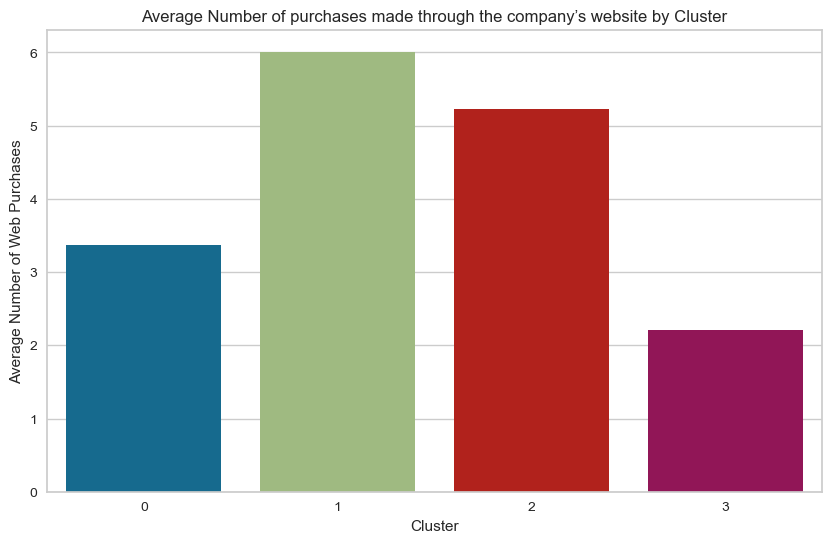

In [49]:
webpurch_means = df.groupby('Clusters')['NumWebPurchases'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='NumWebPurchases', data=webpurch_means)

plt.title('Average Number of purchases made through the company’s website by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Web Purchases')

Text(0, 0.5, 'Average Number of purchase in store')

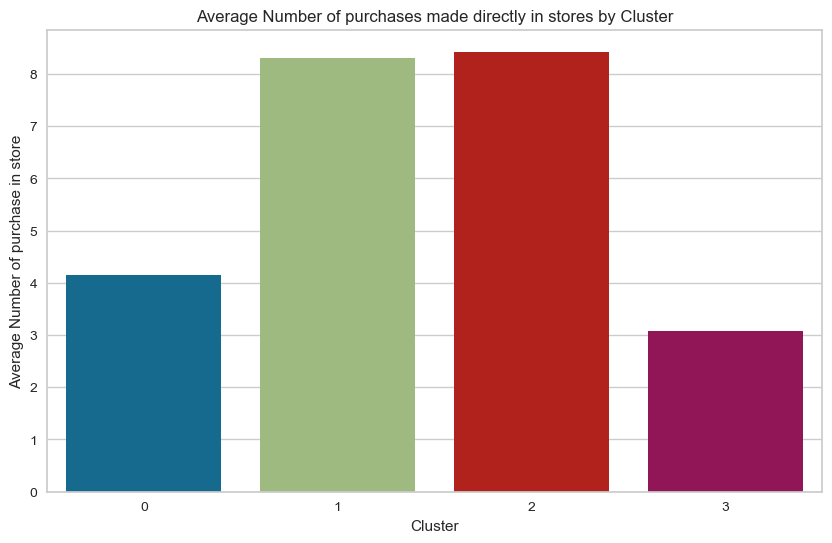

In [50]:
storepurch_means = df.groupby('Clusters')['NumStorePurchases'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='NumStorePurchases', data=storepurch_means)

plt.title('Average Number of purchases made directly in stores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of purchase in store')

Text(0, 0.5, 'Average Number of of visits to company’s website')

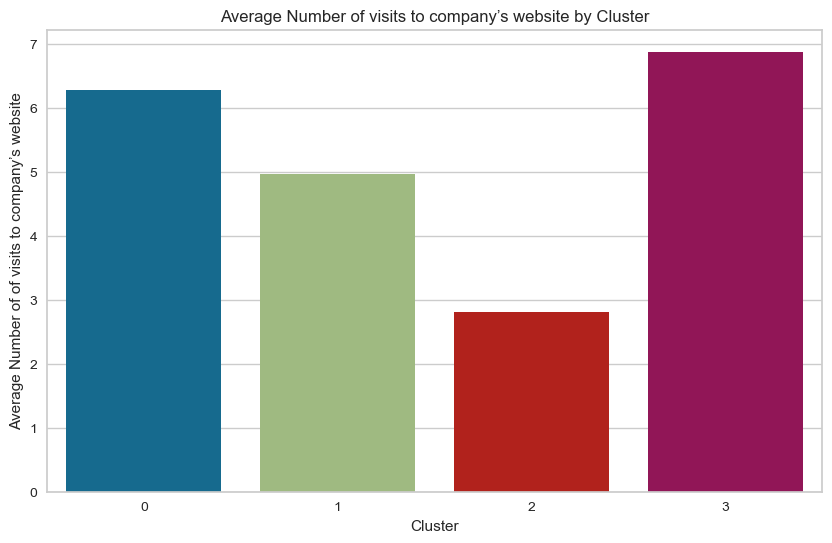

In [51]:
webvisits_means = df.groupby('Clusters')['NumWebVisitsMonth'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='NumWebVisitsMonth', data=webvisits_means)

plt.title('Average Number of visits to company’s website by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of of visits to company’s website')